<a href="https://colab.research.google.com/github/NatanCuello30/Data-Science-1/blob/main/Natan_Cuello_DSIII_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install spacy
!pip install symspellpy
!python -m spacy download en_core_web_md

import warnings
warnings.filterwarnings("ignore")
# Importar las bibliotecas nesesarias
import os
from sklearn.model_selection import train_test_split
from transformers import AutoTokenizer
import torch
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report, confusion_matrix
from textblob import TextBlob
import seaborn as sns
import time
# Importar SMOTE
from imblearn.over_sampling import SMOTE
from nltk.corpus import stopwords # permite acceder directamente a las listas de palabras vacías (stopwords) una vez que se han descargado, sin necesidad de referirse a todo el módulo NLTK.
import pandas as pd #Una librería esencial para la manipulación y análisis de datos estructurados en Python. Utiliza DataFrames para organizar datos en tablas.
import numpy  as np #Una librería fundamental para cálculos numéricos y manipulación de matrices en Python.
import re # Proporciona operaciones de expresiones regulares para buscar y manipular cadenas. Puedes usar re para encontrar todas las direcciones de correo electrónico en el texto, como "juan.perez@example.com" o para extraer todos los números de teléfono en un formato específico, como "+34-123-456-789".
import string # Ofrece una serie de constantes y clases para operaciones comunes con cadenas. Usando las constantes de string, puedes eliminar todos los caracteres de puntuación del texto, resultando en "Hola Como estas Espero que todo este bien".
import plotly # Una librería de gráficos interactivos para crear gráficos de alta calidad para visualización de datos.
import matplotlib.pyplot as plt #Una colección de funciones que hacen que matplotlib sea similar a MATLAB. Se usa para crear gráficos y visualizaciones estáticas, animadas e interactivas en Python.
from nltk.stem import PorterStemmer #Un módulo de NLTK para stemming, es decir, para reducir las palabras a su raíz morfológica.
import time # El módulo time proporciona funciones para trabajar con el tiempo.
import spacy #Una librería para procesamiento de lenguaje natural avanzada y eficiente. Ofrece herramientas para tokenización, etiquetado POS, análisis de dependencias, etc.
import en_core_web_md # Un modelo de spaCy para el idioma español.
from collections import Counter
import nltk # importar natural language toolkit
from nltk import ngrams
from nltk.tokenize import word_tokenize #Una función para dividir el texto en palabras.
from nltk.tokenize import sent_tokenize #Una función para dividir el texto en oraciones.
nltk.download('punkt') # modulo para descargar punkt en diferentes idiomas. El módulo punkt(punto en alemán) incluye modelos preentrenados para varios idiomas, lo que permite reconocer oraciones y palabras en esos idiomas sin necesidad de depender de separadores simples como espacios o signos de puntuación.
nltk.download('stopwords') # modulo para descargar stopwords en diferentes idiomas
nltk.download('wordnet') # modulo para descarga WordNet, una base de datos léxica de inglés que agrupa palabras en conjuntos de sinónimos.
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments
import torch
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import CountVectorizer # Convierte una colección de documentos de texto en una matriz de recuentos de tokens (términos).
from sklearn.feature_extraction.text import TfidfTransformer # Transforma una matriz de recuentos en una matriz de TF-IDF (Frecuencia de Término-Inversa Frecuencia de Documento).
from nltk.probability import FreqDist #Un módulo de NLTK que proporciona herramientas para calcular la distribución de frecuencias de elementos en un corpus.
from wordcloud import WordCloud # Una biblioteca para generar nubes de palabras a partir de un texto. Las nubes de palabras son una forma visual de representar la frecuencia de palabras.
import pickle # Un módulo para serializar y deserializar estructuras de datos de Python, es decir, guardar y cargar objetos de Python en archivos binarios.
from symspellpy import SymSpell # Importación específica: Este comando importa solo la clase SymSpell de la librería symspellpy para su uso en el código.Una librería para corrección ortográfica en tiempo real y sugerencias de palabras. Es rápida y eficiente.
import pkg_resources # Un módulo para trabajar con recursos y dependencias de paquetes en Python. Manejo de recursos: pkg_resources permite acceder y manipular recursos dentro de paquetes instalados, como archivos de datos, plantillas, imágenes, etc.Información de paquetes: Proporciona métodos para obtener información sobre los paquetes instalados, como versiones, autores, descripciones, etc.Resolución de dependencias: Puede ayudar en la resolución de dependencias de paquetes, permitiendo que tu código sea compatible con diferentes versiones de paquetes instalados.Acceso a archivos en paquetes: Permite acceder a archivos dentro de los paquetes instalados, lo que puede ser útil para cargar configuraciones, recursos o datos específicos del paquete.Compatibilidad de plataforma: Proporciona funciones para trabajar con rutas de archivos y nombres de paquetes que son compatibles con diferentes sistemas operativos.
from symspellpy import SymSpell, Verbosity # Clases y constantes de symspellpy para manejar la corrección ortográfica y la generación de sugerencias. Lo que facilita su utilización sin tener que importar cada elemento por separado, simplificando así el desarrollo de aplicaciones que requieran corrección ortográfica y sugerencias de palabras.


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 58.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Cargar el dataset de reseñas de peliculas de IMDb en un DataFrame
import pandas as pd
dataset_path = "/content/drive/My Drive/imdb_tvshows.csv"  # levanto el data set con varibale relativ
df = pd.read_csv(dataset_path)

# Mostrar las primeras filas del DataFrame
print(df.head())


   Unnamed: 0  Rating (out of 10)  \
0           0                   9   
1           1                  10   
2           2                  10   
3           3                   9   
4           4                   9   

                                              Review    Show ID   Review ID  
0  Andor was every bit as good as I was hoping fo...  tt9253284  rw10514299  
1  Wow. I just finished episode 12 of the first s...  tt9253284   rw8690571  
2  Andor Season 2 is the best Star Wars Show ever...  tt9253284  rw10514285  
3  There were a few episodes I didn't like in bot...  tt9253284  rw10514788  
4  Didnt like the new movies and even Mandalorian...  tt9253284   rw8665236  


DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB

Missing values in each column:
Unnamed: 0            0
Rating (out of 10)    0
Review                0
Show ID               0
Review ID             0
dtype: int64


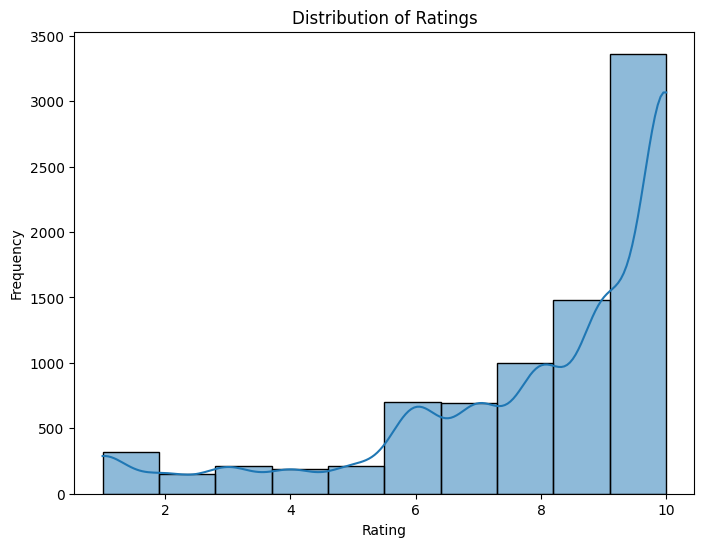

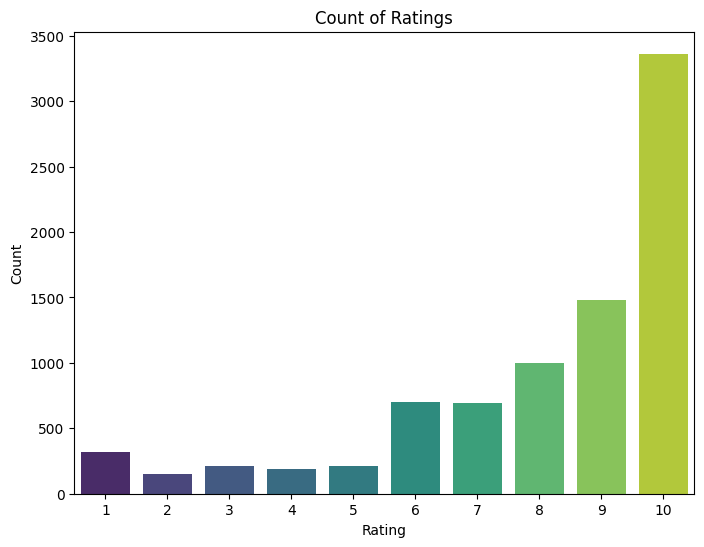

In [5]:
# Info basica
print('DataFrame Information:')
df.info()

# Revisamos nulos
print('\nMissing values in each column:')
print(df.isnull().sum())

# Distribucion of ratings
plt.figure(figsize=(8, 6))
sns.histplot(df['Rating (out of 10)'], kde=True, bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Countplot para frecuencia
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating (out of 10)', data=df, palette='viridis')
plt.title('Count of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [6]:
# Mostrar informacion general sobre el DataFrame
print(df.info())
# Mostrar una muestra aleatoria de 5 filas del DataFrame
print(df.sample(5))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8319 entries, 0 to 8318
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8319 non-null   int64 
 1   Rating (out of 10)  8319 non-null   int64 
 2   Review              8319 non-null   object
 3   Show ID             8319 non-null   object
 4   Review ID           8319 non-null   object
dtypes: int64(2), object(3)
memory usage: 325.1+ KB
None
      Unnamed: 0  Rating (out of 10)  \
4391        4391                   8   
25            25                  10   
7161        7161                   8   
2674        2674                   5   
7669        7669                  10   

                                                 Review     Show ID  Review ID  
4391  Amazing drama. Amazing acting. Lots of twists....   tt2442560  rw7932033  
25    No wonder they decided to release 3 episodes a...   tt9253284  rw8558473  
7161  Played the 

Descripción Estadística: Proporciona estadísticas como la media, mediana, y desviación estándar para las columnas numéricas, ayudando a entender la distribución de los datos.



In [7]:
print(df.describe())


        Unnamed: 0  Rating (out of 10)
count  8319.000000         8319.000000
mean   4159.000000            8.063349
std    2401.632778            2.441713
min       0.000000            1.000000
25%    2079.500000            7.000000
50%    4159.000000            9.000000
75%    6238.500000           10.000000
max    8318.000000           10.000000


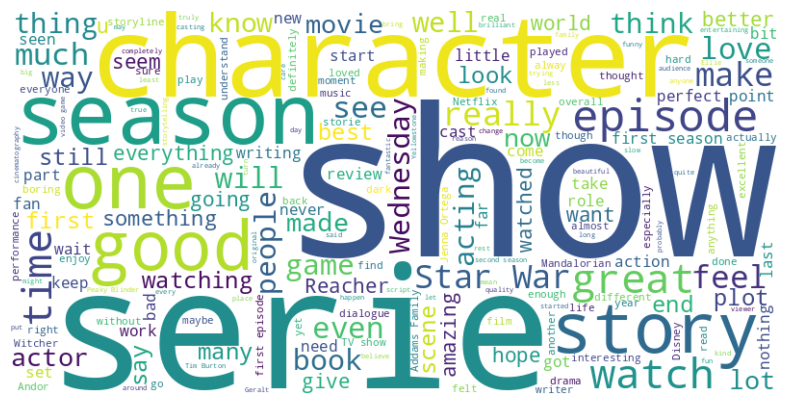

In [8]:
text = ' '.join(df['Review'].dropna())  # Combina todos los textos en una sola cadena

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()


In [9]:
# Cargar el modelo en inglés de tamaño mediano
nlp = spacy.load('en_core_web_md')

In [10]:
# Función para extraer entidades
def extract_entities(reviews):
    entities = []
    for review in reviews:
        doc = nlp(review)
        for ent in doc.ents:
            entities.append(ent.text)
    return entities

# Extraer entidades de la columna 'Review'
entities = extract_entities(df['Review'].tolist())

# Contar la frecuencia de las entidades
entity_counts = Counter(entities)

# Obtener las 10 entidades más comunes
top_entities = entity_counts.most_common(10)
print("Top 10 entidades más usadas:")
for entity, count in top_entities:
    print(f"{entity}: {count}")

Top 10 entidades más usadas:
first: 1759
Wednesday: 1662
one: 1068
Star Wars: 802
two: 640
season 2: 550
Netflix: 524
Witcher: 462
second: 449
Mandalorian: 443


In [11]:
# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    return list(ngrams(tokens, 3))

# Almacenar trigramas relacionados con las entidades
trigrams_by_entity = {entity: [] for entity, _ in top_entities}

# Generar trigramas para cada reseña y relacionarlos con las entidades
for review in df['Review']:
    trigrams = generate_trigrams(review)
    for entity in trigrams_by_entity.keys():
        if entity in review:
            trigrams_by_entity[entity].extend(trigrams)

# Mostrar trigramas relacionados con las entidades
for entity, trigrams in trigrams_by_entity.items():
    print(f"\nTrigramas relacionados con la entidad '{entity}':")
    # Contar trigramas y mostrar los más comunes
    trigram_counts = Counter(trigrams)
    for trigram, count in trigram_counts.most_common(5):  # Mostrar los 5 más comunes
        print(f"{trigram}: {count}")



Trigramas relacionados con la entidad 'first':
('one', 'of', 'the'): 231
('the', 'first', 'season'): 230
('in', 'the', 'first'): 195
('the', 'first', 'episode'): 195
('a', 'lot', 'of'): 189

Trigramas relacionados con la entidad 'Wednesday':
('a', 'lot', 'of'): 81
('the', 'Addams', 'Family'): 75
('of', 'the', 'Addams'): 72
('Jenna', 'Ortega', 'is'): 71
('one', 'of', 'the'): 61

Trigramas relacionados con la entidad 'one':
('one', 'of', 'the'): 682
('a', 'lot', 'of'): 406
('of', 'the', 'best'): 383
('is', 'one', 'of'): 250
('this', 'show', 'is'): 249

Trigramas relacionados con la entidad 'Star Wars':
('the', 'Star', 'Wars'): 277
('a', 'Star', 'Wars'): 100
('of', 'Star', 'Wars'): 84
('Star', 'Wars', 'universe'): 82
('one', 'of', 'the'): 72

Trigramas relacionados con la entidad 'two':
('the', 'first', 'two'): 139
('a', 'lot', 'of'): 128
('one', 'of', 'the'): 113
('some', 'of', 'the'): 74
('of', 'the', 'best'): 69

Trigramas relacionados con la entidad 'season 2':
('wait', 'for', 'seaso

In [12]:


# Eliminar filas con valores nulos en la columna 'Review'
reviews = df['Review'].dropna()

# Obtener las stopwords en inglés y crear un conjunto
stop_words = set(stopwords.words('english'))

# Agregar stopwords personalizadas directamente
custom_stopwords = {'show', 'series', 'episode'}  # Acá le meto cosas nuevcas si necesito
stop_words.update(custom_stopwords)  # Combinar stopwords de NLTK con las personalizadas

# Eliminar stopwords y lematizar en un solo paso
lemmatized_words = []

for review in reviews:
    # Convertir a minúsculas
    review = review.lower()

    # Procesar cada reseña individualmente
    doc = nlp(review)
    lemmatized_words.extend([token.lemma_ for token in doc if token.text.lower() not in stop_words and not token.is_punct])


Probando que palabras pueden o no estar en las stopwords del modelo

In [13]:
# Obtener la lista de stopwords del modelo
stop_words = nlp.Defaults.stop_words

# Palabras a verificar
words_to_check = ["know", "well", "think"]

# Verificar si las palabras están en la lista de stopwords
for word in words_to_check:
    if word.lower() in stop_words:  # Convertir a minúsculas para la verificación
        print(f"{word} es una stopword.")
    else:
        print(f"{word} NO es una stopword.")

know NO es una stopword.
well es una stopword.
think NO es una stopword.


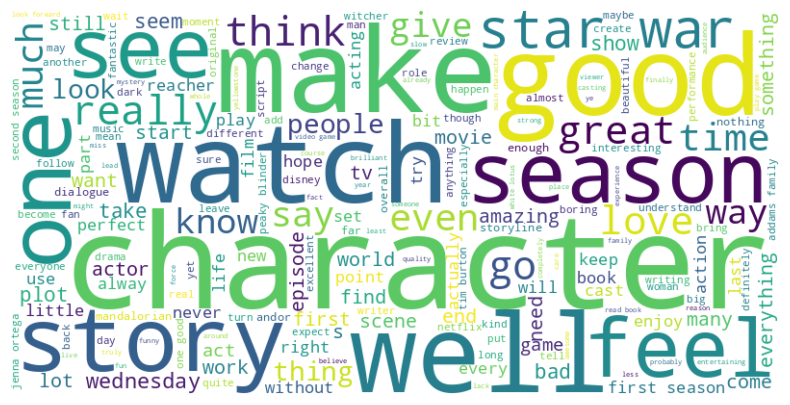

In [14]:
# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(lemmatized_words))

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # No mostrar ejes
plt.show()


In [15]:
# Contar la frecuencia de las palabras lematizadas
word_counts = Counter(lemmatized_words)

# Obtener las 50 palabras más comunes
most_common_words = word_counts.most_common(50)

# Crear un DataFrame para la tabla
table_data = pd.DataFrame(most_common_words, columns=['Palabra', 'Frecuencia'])

# Mostrar la tabla
print(table_data)

      Palabra  Frecuencia
0                   12244
1          be        9594
2      season        7807
3         not        7632
4   character        6585
5        like        5573
6       watch        5570
7        good        5475
8         one        4289
9        well        4143
10      story        4056
11       make        3896
12        get        3426
13      great        3375
14        see        3286
15         's        3131
16     really        3007
17      first        2998
18       time        2839
19       love        2688
20       feel        2623
21      would        2595
22       star        2592
23         go        2529
24        war        2300
25      think        2198
26       much        2179
27       game        2159
28       even        2083
29    episode        1981
30       give        1895
31  wednesday        1885
32          2        1876
33      thing        1858
34        say        1840
35       also        1829
36       look        1825
37     peopl

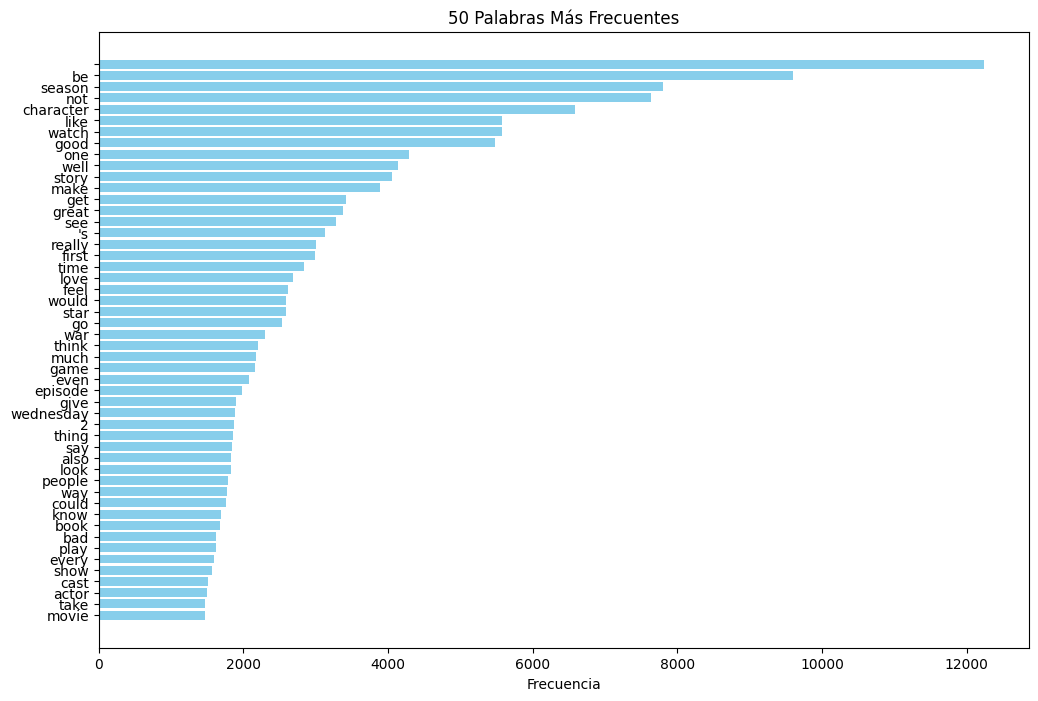

In [16]:
# Separar las palabras y sus frecuencias
words, frequencies = zip(*most_common_words)

# Crear la figura y los ejes
plt.figure(figsize=(12, 8))

# Graficar las 50 palabras más frecuentes
plt.barh(words, frequencies, color='skyblue')
plt.xlabel('Frecuencia')
plt.title('50 Palabras Más Frecuentes')
plt.gca().invert_yaxis()  # Invertir el eje y para que la palabra más frecuente esté en la parte superior

# Mostrar el gráfico
plt.show()

In [17]:
# Eliminar la columna de índice
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
    print('Columna eliminada: Unnamed: 0')


# Función básica de limpieza de texto
def clean_text(text):
    if isinstance(text, str):
        text = text.lower().strip()
        # Se pueden agregar pasos adicionales de limpieza (eliminación de puntuación, etc.)
        return text
    return text


# Aplicar limpieza de texto en la columna 'Review'
df['Review'] = df['Review'].apply(clean_text)
print('Limpieza de texto aplicada a la columna Review.')


# Verificar la limpieza
df['Review'].head()


Columna eliminada: Unnamed: 0
Limpieza de texto aplicada a la columna Review.


,Review
0,andor was every bit as good as i was hoping fo...
1,wow. i just finished episode 12 of the first s...
2,andor season 2 is the best star wars show ever...
3,there were a few episodes i didn't like in bot...
4,didnt like the new movies and even mandalorian...


Precisión de la predicción en el conjunto de prueba: 0.19651442307692307

Informe de Clasificación:
              precision    recall  f1-score   support

           1       0.10      0.17      0.12        63
           2       0.06      0.07      0.06        29
           3       0.06      0.07      0.06        44
           4       0.02      0.03      0.02        35
           5       0.00      0.00      0.00        34
           6       0.09      0.12      0.11       143
           7       0.10      0.13      0.11       136
           8       0.12      0.16      0.14       197
           9       0.20      0.19      0.20       309
          10       0.40      0.27      0.33       674

    accuracy                           0.20      1664
   macro avg       0.12      0.12      0.12      1664
weighted avg       0.24      0.20      0.21      1664



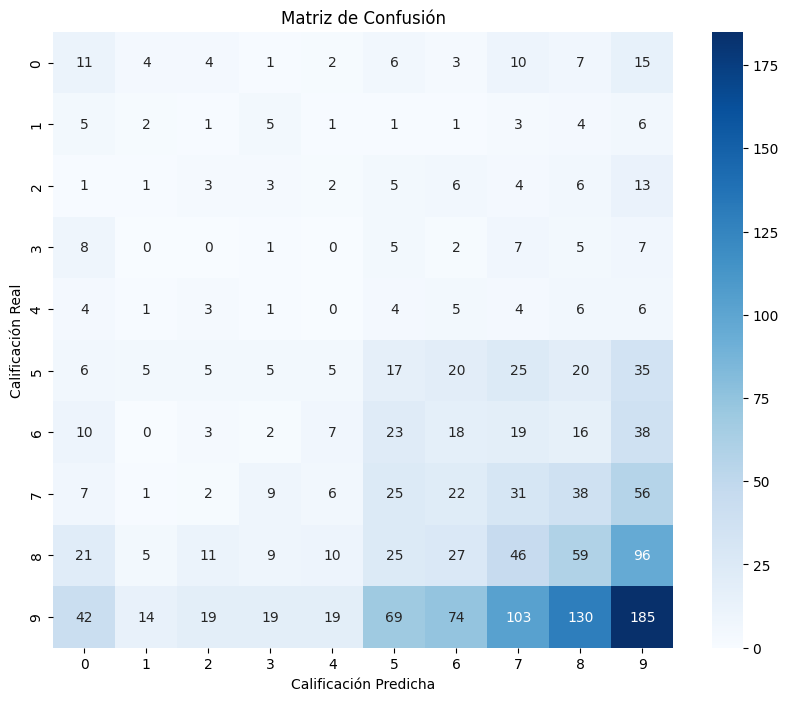

In [18]:
# Preparamos las características y el objetivo
X = df['Review']
y = df['Rating (out of 10)']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Vectorización TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Balanceo de clases utilizando SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_tfidf, y_train)

# Inicializar y entrenar un clasificador de regresión logística con más iteraciones
clf = LogisticRegression(max_iter=3000, solver='lbfgs', multi_class='multinomial')
clf.fit(X_train_balanced, y_train_balanced)

# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test_tfidf)

# Calcular la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred)
print('Precisión de la predicción en el conjunto de prueba:', accuracy)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


Predicciones Incorrectas:
                                                 Review  Actual Rating  \
1744  i loved it at the beginning but if you start f...              6   
2114  wow , i don't know what's been keeping me from...              9   
3352  i see many reviews here applauding the series ...              9   
2321  best show ever! love beth and rip, they are my...              8   
1835  seasons 1-3 are great with an interesting plot...              9   
5912  a realy good story :-) a must see for a star w...              8   
5335  all i honestly have to say is that who they ch...              9   
4160  an intriguing and interesting tv series, you c...             10   
3783  the series was slow, many times i found myself...              9   
7019  i want to say if you like g.o.t then you must ...             10   

      Predicted Rating  
1744                 5  
2114                10  
3352                10  
2321                 5  
1835                 1  
5912     

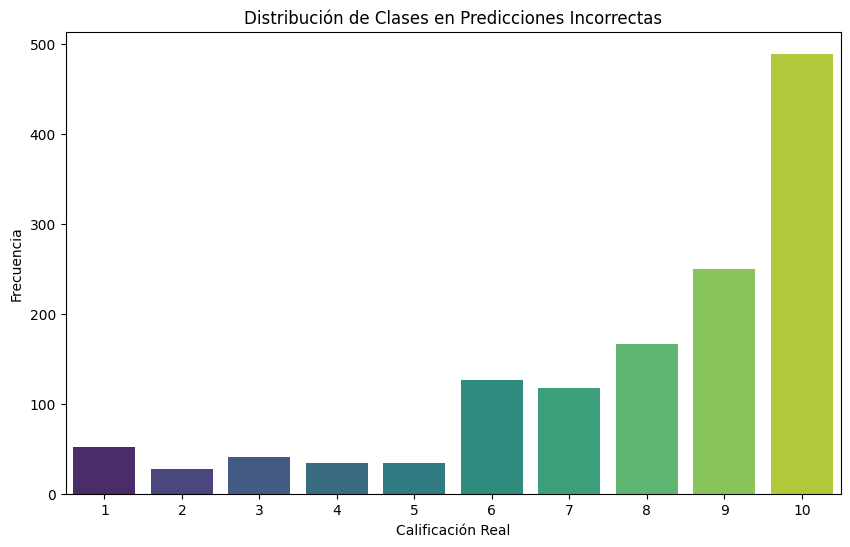

In [19]:
# Predecir en el conjunto de prueba
y_pred = clf.predict(X_test_tfidf)

# Crear un DataFrame con las reseñas, las predicciones y las etiquetas reales
results_df = pd.DataFrame({
    'Review': X_test,
    'Actual Rating': y_test,
    'Predicted Rating': y_pred
})

# Filtrar las instancias clasificadas incorrectamente
incorrect_predictions = results_df[results_df['Actual Rating'] != results_df['Predicted Rating']]

# Mostrar las primeras filas de las predicciones incorrectas
print("Predicciones Incorrectas:")
print(incorrect_predictions.head(10))

# Contar la frecuencia de las clases en las predicciones incorrectas
error_counts = incorrect_predictions['Actual Rating'].value_counts()

# Visualizar la distribución de las clases en las predicciones incorrectas
plt.figure(figsize=(10, 6))
sns.countplot(x='Actual Rating', data=incorrect_predictions, palette='viridis')
plt.title('Distribución de Clases en Predicciones Incorrectas')
plt.xlabel('Calificación Real')
plt.ylabel('Frecuencia')
plt.show()

In [20]:
print(df.head())

   Rating (out of 10)                                             Review  \
0                   9  andor was every bit as good as i was hoping fo...   
1                  10  wow. i just finished episode 12 of the first s...   
2                  10  andor season 2 is the best star wars show ever...   
3                   9  there were a few episodes i didn't like in bot...   
4                   9  didnt like the new movies and even mandalorian...   

     Show ID   Review ID  
0  tt9253284  rw10514299  
1  tt9253284   rw8690571  
2  tt9253284  rw10514285  
3  tt9253284  rw10514788  
4  tt9253284   rw8665236  


In [21]:
# Definir una función para clasificar las calificaciones
def classify_rating(rating):
    if rating >= 0 and rating <= 4:
        return 'Negative'
    elif rating >= 5 and rating <= 6:
        return 'Neutral'
    elif rating >= 7 and rating <= 10:
        return 'Positive'
    else:
        return None  # Para manejar cualquier valor fuera del rango esperado

# Aplicar la función a la columna 'Rating (out of 10)' y crear la nueva columna 'P/N'
df['P/N'] = df['Rating (out of 10)'].apply(classify_rating)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['Rating (out of 10)', 'P/N']].head(15))


    Rating (out of 10)       P/N
0                    9  Positive
1                   10  Positive
2                   10  Positive
3                    9  Positive
4                    9  Positive
5                    9  Positive
6                    9  Positive
7                    9  Positive
8                    8  Positive
9                    7  Positive
10                   9  Positive
11                   9  Positive
12                  10  Positive
13                  10  Positive
14                  10  Positive


In [22]:
from textblob import TextBlob

# Función para clasificar el sentimiento basado en la polaridad
def classify_sentiment(review):
    analysis = TextBlob(review)
    polarity = analysis.sentiment.polarity  # Obtener la polaridad
    if polarity < 0:
        return 'Negative'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Positive'

# Aplicar la función a la columna 'Review' y crear la nueva columna 'Sentiment'
df['Sentiment'] = df['Review'].apply(classify_sentiment)

# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df[['Review', 'P/N', 'Sentiment']].head(15))


                                               Review       P/N Sentiment
0   andor was every bit as good as i was hoping fo...  Positive  Positive
1   wow. i just finished episode 12 of the first s...  Positive  Positive
2   andor season 2 is the best star wars show ever...  Positive  Positive
3   there were a few episodes i didn't like in bot...  Positive  Positive
4   didnt like the new movies and even mandalorian...  Positive  Positive
5   i'll say it again: andor is one of the best pi...  Positive  Positive
6   this is, minute for minute, some of the best t...  Positive  Positive
7   andor is why i pay my disney+ subscription. th...  Positive  Positive
8   i am going to put it plain and simple.  this s...  Positive  Positive
9   this is the show anyone who grew up with class...  Positive  Positive
10  i'm note sure which is my favorite between the...  Positive  Positive
11  andor is everything i didn't know i needed to ...  Positive  Positive
12  arguably the best thing to come ou

Precisión del análisis de sentimiento: 70.95%


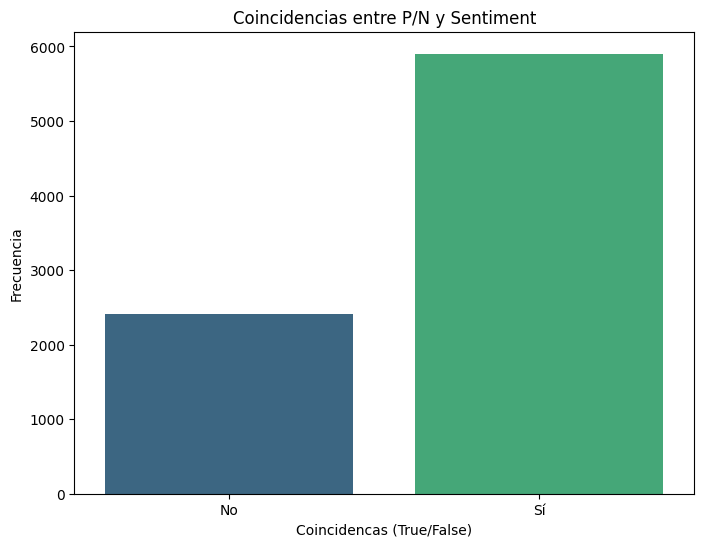

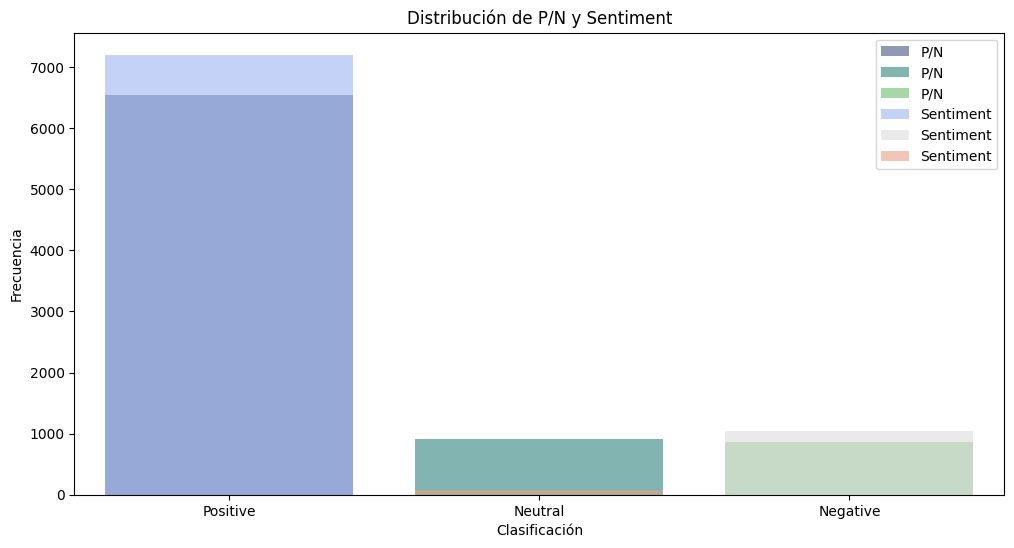

In [23]:
# Contar las coincidencias entre 'P/N' y 'Sentiment'
matches = (df['P/N'] == df['Sentiment']).sum()
total = df.shape[0]
accuracy = matches / total

# Imprimir la precisión
print(f'Precisión del análisis de sentimiento: {accuracy:.2%}')

# Crear un DataFrame para visualizar las coincidencias y discrepancias
comparison_df = df[['P/N', 'Sentiment']].copy()
comparison_df['Match'] = comparison_df['P/N'] == comparison_df['Sentiment']

# Contar coincidencias y discrepancias
match_counts = comparison_df['Match'].value_counts()

# Visualizar los resultados
plt.figure(figsize=(8, 6))
sns.countplot(x='Match', data=comparison_df, palette='viridis')
plt.title('Coincidencias entre P/N y Sentiment')
plt.xlabel('Coincidencas (True/False)')
plt.ylabel('Frecuencia')
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])
plt.show()

# Mostrar la distribución de P/N y Sentiment
plt.figure(figsize=(12, 6))
sns.countplot(x='P/N', data=comparison_df, palette='viridis', alpha=0.6, label='P/N')
sns.countplot(x='Sentiment', data=comparison_df, palette='coolwarm', alpha=0.6, label='Sentiment')
plt.title('Distribución de P/N y Sentiment')
plt.xlabel('Clasificación')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

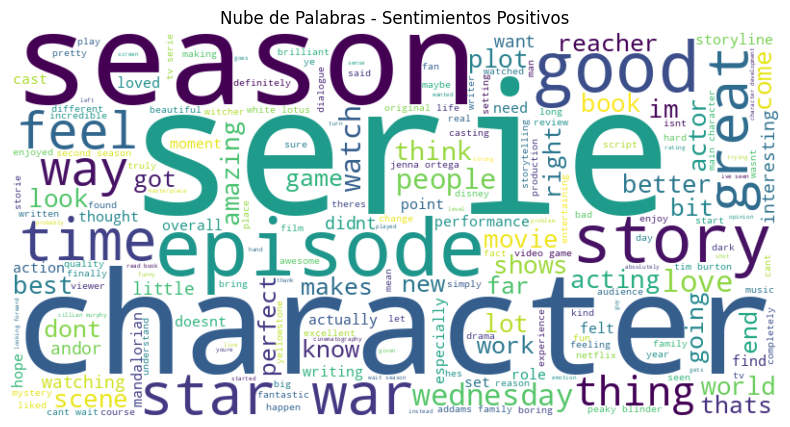

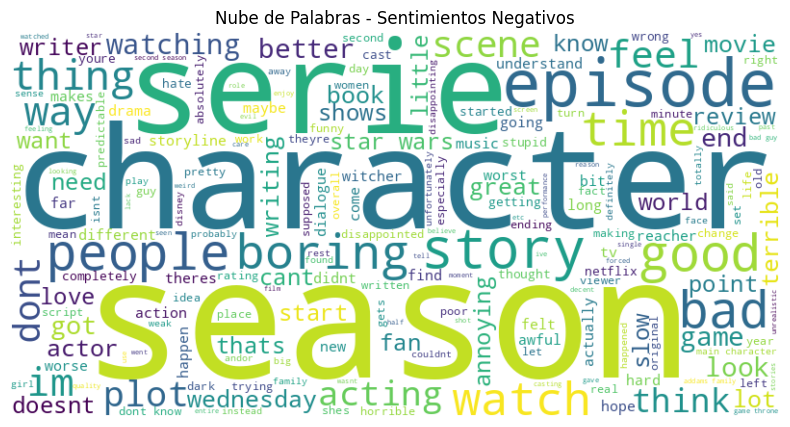

Trigramas más comunes - Sentimientos Positivos:
star wars universe: 186
cant wait season: 177
star wars fan: 111
wait season 2: 104
best star wars: 90
looking forward season: 87
like star wars: 71
star wars fans: 64
star wars movies: 55
disney star wars: 52

Trigramas más comunes - Sentimientos Negativos:
like star wars: 12
star wars universe: 11
season 1 2: 11
episodes season 2: 9
reacher reacher reacher: 9
watch season 2: 9
seasons 1 2: 8
cant wait season: 7
dont waste time: 7
read books played: 7


In [24]:
# Función para limpiar el texto y eliminar stopwords
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Eliminar menciones de Twitter
    text = re.sub(r'@\w+', '', text)

    # Eliminar caracteres especiales y puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar y eliminar stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Filtrar reseñas positivas y negativas
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].apply(clean_text)
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].apply(clean_text)

# Unir todas las reseñas en una sola cadena
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)

# Generar la nube de palabras para sentimientos positivos
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

# Mostrar la nube de palabras para sentimientos positivos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sentimientos Positivos')
plt.show()

# Generar la nube de palabras para sentimientos negativos
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

# Mostrar la nube de palabras para sentimientos negativos
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Sentimientos Negativos')
plt.show()

# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    trigrams = ngrams(tokens, 3)
    return [' '.join(trigram) for trigram in trigrams]

# Generar trigramas para sentimientos positivos
positive_trigrams = generate_trigrams(positive_text)
positive_trigram_counts = Counter(positive_trigrams).most_common(10)

# Generar trigramas para sentimientos negativos
negative_trigrams = generate_trigrams(negative_text)
negative_trigram_counts = Counter(negative_trigrams).most_common(10)

# Mostrar los trigramas más comunes para sentimientos positivos
print("Trigramas más comunes - Sentimientos Positivos:")
for trigram, count in positive_trigram_counts:
    print(f"{trigram}: {count}")

# Mostrar los trigramas más comunes para sentimientos negativos
print("\nTrigramas más comunes - Sentimientos Negativos:")
for trigram, count in negative_trigram_counts:
    print(f"{trigram}: {count}")

In [25]:
# Función para limpiar el texto y eliminar stopwords
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()

    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Eliminar menciones de Twitter
    text = re.sub(r'@\w+', '', text)

    # Eliminar caracteres especiales y puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenizar y eliminar stopwords
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

# Filtrar reseñas positivas y negativas
positive_reviews = df[df['Sentiment'] == 'Positive']['Review'].apply(clean_text)
negative_reviews = df[df['Sentiment'] == 'Negative']['Review'].apply(clean_text)

# Unir todas las reseñas en una sola cadena
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)



# Función para generar trigramas
def generate_trigrams(text):
    tokens = text.split()
    trigrams = ngrams(tokens, 4)
    return [' '.join(trigram) for trigram in trigrams]

# Generar trigramas para sentimientos positivos
positive_trigrams = generate_trigrams(positive_text)
positive_trigram_counts = Counter(positive_trigrams).most_common(10)

# Generar trigramas para sentimientos negativos
negative_trigrams = generate_trigrams(negative_text)
negative_trigram_counts = Counter(negative_trigrams).most_common(10)

# Mostrar los trigramas más comunes para sentimientos positivos
print("Trigramas más comunes - Sentimientos Positivos:")
for trigram, count in positive_trigram_counts:
    print(f"{trigram}: {count}")

# Mostrar los trigramas más comunes para sentimientos negativos
print("\nTrigramas más comunes - Sentimientos Negativos:")
for trigram, count in negative_trigram_counts:
    print(f"{trigram}: {count}")

Trigramas más comunes - Sentimientos Positivos:
cant wait season 2: 77
looking forward season 2: 30
pedro pascal bella ramsey: 29
read books played games: 27
galaxy far far away: 21
feels like star wars: 20
cant wait second season: 17
played games read books: 17
im looking forward season: 16
night lucky night lucky: 16

Trigramas más comunes - Sentimientos Negativos:
reacher reacher reacher reacher: 8
season 1 season 2: 5
read books played games: 5
sorry 600 letters little: 5
600 letters little im: 5
letters little im trying: 5
little im trying minimum: 5
cant wait season 2: 4
im trying minimum sorry: 4
trying minimum sorry 600: 4


In [26]:
# Mostrar las primeras filas del DataFrame para verificar la nueva columna
print(df.head(15))

    Rating (out of 10)                                             Review  \
0                    9  andor was every bit as good as i was hoping fo...   
1                   10  wow. i just finished episode 12 of the first s...   
2                   10  andor season 2 is the best star wars show ever...   
3                    9  there were a few episodes i didn't like in bot...   
4                    9  didnt like the new movies and even mandalorian...   
5                    9  i'll say it again: andor is one of the best pi...   
6                    9  this is, minute for minute, some of the best t...   
7                    9  andor is why i pay my disney+ subscription. th...   
8                    8  i am going to put it plain and simple.  this s...   
9                    7  this is the show anyone who grew up with class...   
10                   9  i'm note sure which is my favorite between the...   
11                   9  andor is everything i didn't know i needed to ...   

In [1]:
# Preparamos las características y el objetivo
X = df['Review'].tolist()
y = df['P/N'].tolist()

# Convertir las etiquetas a números
label_mapping = {'Positive': 0, 'Neutral': 1, 'Negative': 2}
y = [label_mapping[label] for label in y]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train)
test_dataset = ReviewDataset(test_encodings, y_test)

# Cargar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Ajusta num_labels según tus clases

# Configurar los argumentos de entrenamiento
training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=6,  # Aumentar el número de épocas si es necesario
    per_device_train_batch_size=16,  # Ajustar según la memoria de la GPU
    per_device_eval_batch_size=32,  # Tamaño de lote más grande para evaluación
    warmup_steps=1000,  # Ajustar según el tamaño del conjunto de datos
    weight_decay=0.01,  # Mantener el decaimiento de peso
    learning_rate=3e-5,  # Probar con una tasa de aprendizaje más baja
    logging_dir='./logs',
    logging_steps=100,  # Frecuencia de registro
)




NameError: name 'df' is not defined

In [ ]:

# Entrenar el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

In [ ]:
# Predecir en el conjunto de prueba
y_pred = trainer.predict(test_dataset)

# Obtener las predicciones
y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()



In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred_labels, target_names=['Positive', 'Neutral', 'Negative']))

# Graficar la matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Neutral', 'Negative'], yticklabels=['Positive', 'Neutral', 'Negative'])
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


In [ ]:
# Preparamos las características y el objetivo
X = df['Review'].tolist()
y = df['Rating (out of 10)'].tolist()

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cargar el tokenizer de BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenizar los datos
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

# Convertir a tensores de PyTorch
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = ReviewDataset(train_encodings, y_train)
test_dataset = ReviewDataset(test_encodings, y_test)

# Cargar el modelo de BERT para clasificación
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)  # Ajusta num_labels según tus clases

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=6,  # Aumentar el número de épocas si es necesario
    per_device_train_batch_size=16,  # Ajustar según la memoria de la GPU
    per_device_eval_batch_size=32,  # Tamaño de lote más grande para evaluación
    warmup_steps=1000,  # Ajustar según el tamaño del conjunto de datos
    weight_decay=0.01,  # Mantener el decaimiento de peso
    learning_rate=3e-5,  # Probar con una tasa de aprendizaje más baja
    logging_dir='./logs',
    logging_steps=100,  # Frecuencia de registro
)

# Entrenar el modelo
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()

# Evaluar el modelo
trainer.evaluate()

In [ ]:
# Predecir en el conjunto de prueba
y_pred = trainer.predict(test_dataset)

# Obtener las predicciones
y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()

# Calcular la puntuación de precisión
accuracy = accuracy_score(y_test, y_pred_labels)
print(f'Precisión de la predicción en el conjunto de prueba: {accuracy:.2%}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación:')
print(classification_report(y_test, y_pred_labels))

# Graficar la matriz de confusión
cm = confusion_matrix(y_test, y_pred_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()


In [ ]:
# Definir el número de pliegues
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Almacenar los resultados
accuracies = []
all_y_true = []
all_y_pred = []

# Tokenizar los datos una vez
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

for train_index, val_index in kf.split(X):
    # Dividir los datos en conjuntos de entrenamiento y validación
    X_train, X_val = np.array(X)[train_index], np.array(X)[val_index]
    y_train, y_val = np.array(y)[train_index], np.array(y)[val_index]

    # Tokenizar los datos
    train_encodings = tokenizer(X_train.tolist(), truncation=True, padding=True)
    val_encodings = tokenizer(X_val.tolist(), truncation=True, padding=True)

    # Crear datasets
    train_dataset = ReviewDataset(train_encodings, y_train)
    val_dataset = ReviewDataset(val_encodings, y_val)

    # Cargar el modelo de BERT para clasificación
    model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=11)

    # Configurar los argumentos de entrenamiento
    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=6,  # Ajusta según sea necesario
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        warmup_steps=1000,
        weight_decay=0.01,
        learning_rate=3e-5,
        logging_dir='./logs',
        logging_steps=100,
    )

    # Entrenar el modelo
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
    )

    trainer.train()

    # Predecir en el conjunto de validación
    y_pred = trainer.predict(val_dataset)

    # Obtener las predicciones
    y_pred_labels = torch.argmax(torch.tensor(y_pred.predictions), axis=1).numpy()

    # Calcular la puntuación de precisión
    accuracy = accuracy_score(y_val, y_pred_labels)
    accuracies.append(accuracy)

    # Almacenar las etiquetas verdaderas y predicciones
    all_y_true.extend(y_val)
    all_y_pred.extend(y_pred_labels)

# Mostrar resultados de la validación cruzada
print(f'Precisión promedio de la validación cruzada: {np.mean(accuracies):.2%}')

# Mostrar el informe de clasificación
print('\nInforme de Clasificación Final:')
print(classification_report(all_y_true, all_y_pred))

# Graficar la matriz de confusión
cm = confusion_matrix(all_y_true, all_y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Validación Cruzada')
plt.xlabel('Calificación Predicha')
plt.ylabel('Calificación Real')
plt.show()
